In [648]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("./dataset/spam.csv", encoding='latin-1')
print(df.shape)
print("\n", df["v1"].value_counts(), "\n")
df.head()

(5572, 5)

 v1
ham     4825
spam     747
Name: count, dtype: int64 



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **1. Data Cleaning**

In [650]:
# df.isnull().sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [651]:
#removing last 3 cols since most of them is NaN(null)

df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [652]:
#renaming cols
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [653]:
#LabelEncoder is used to conver categorical label into numerical labels
#encoding: ham->0, spam->1

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])
print(f"Target labels: {df["target"].unique()}")
df.head()

Target labels: [0 1]


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [654]:
#checking for missing values

df.isnull().sum()

,0
target,0
text,0


In [655]:
#checking for duplicates

print(f"Before droping: {df.duplicated().sum()}")

#droping the duplicate cols
df.drop_duplicates(keep="first", inplace=True)
print(f"After droping: {df.duplicated().sum()}")
print(f"Shape of data: {df.shape}")

Before droping: 403
After droping: 0
Shape of data: (5169, 2)


# **2. EDA**

target
0    4516
1     653
Name: count, dtype: int64 



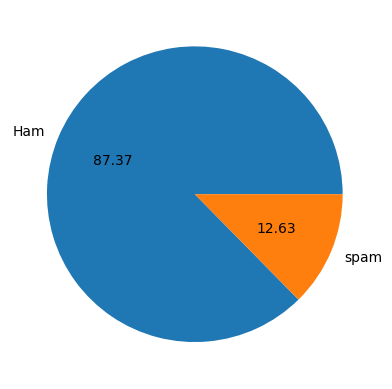

In [656]:
#getting the numbers of spam and ham rows

print(df["target"].value_counts(), "\n")

#ploting it
plt.pie(df["target"].value_counts(), labels=["Ham", "spam"], autopct="%0.2f")
plt.show()

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [658]:
'''
Creating 3 new cols:
1. number of chars
2. number of words
3. number of sentences
'''

df["num_chars"] = df["text"].apply(len)     #len func calculates the len of chars
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df["num_sentence"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#getting the general idea of data

df.iloc[:, 2::].describe()

,num_chars,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


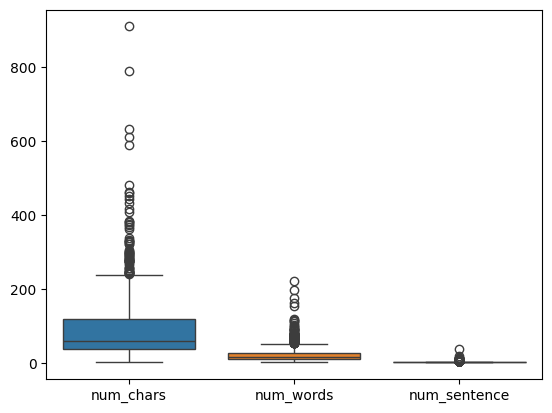

In [ ]:
#plotting the boxplot for whole data

sns.boxplot(df.iloc[:, 2::])
plt.show()

In [661]:
#for ham messages
df[df["target"]==0].iloc[:, 2::].describe()

,num_chars,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [662]:
#for spam messages
df[df["target"]==1].iloc[:, 2::].describe()

,num_chars,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


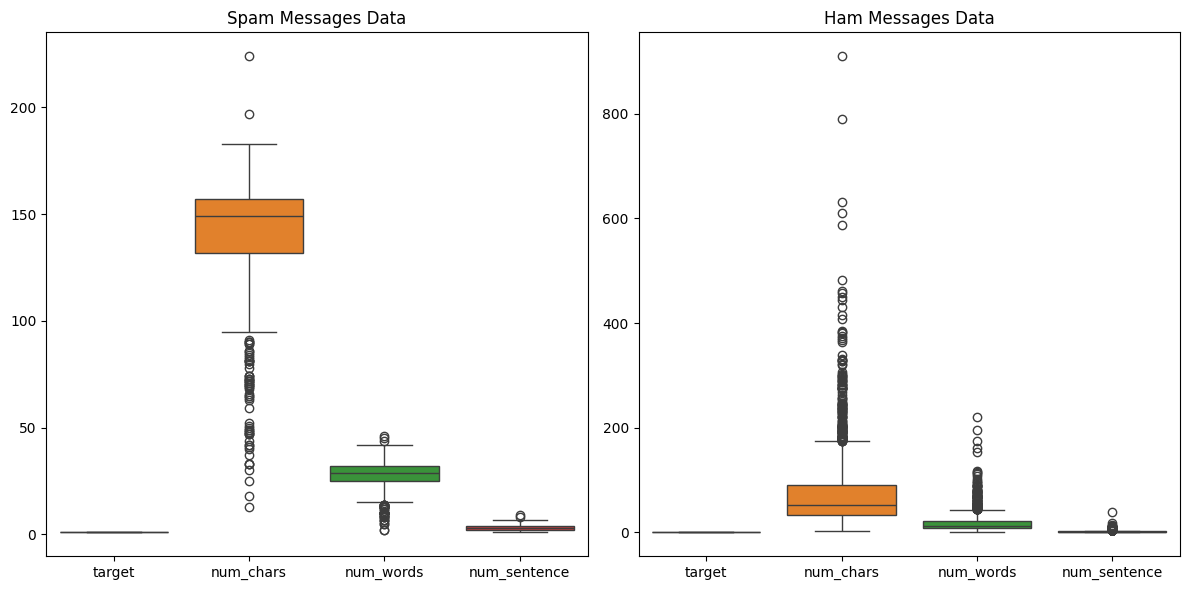

In [663]:
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability

plt.subplot(1, 2, 1)
sns.boxplot(df[df['target'] == 1]) # Filter for spam (target == 1)
plt.title('Spam Messages Data') # Add title

plt.subplot(1, 2, 2)
sns.boxplot(df[df['target'] == 0]) # Filter for ham (target == 0)
plt.title('Ham Messages Data') # Add title

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

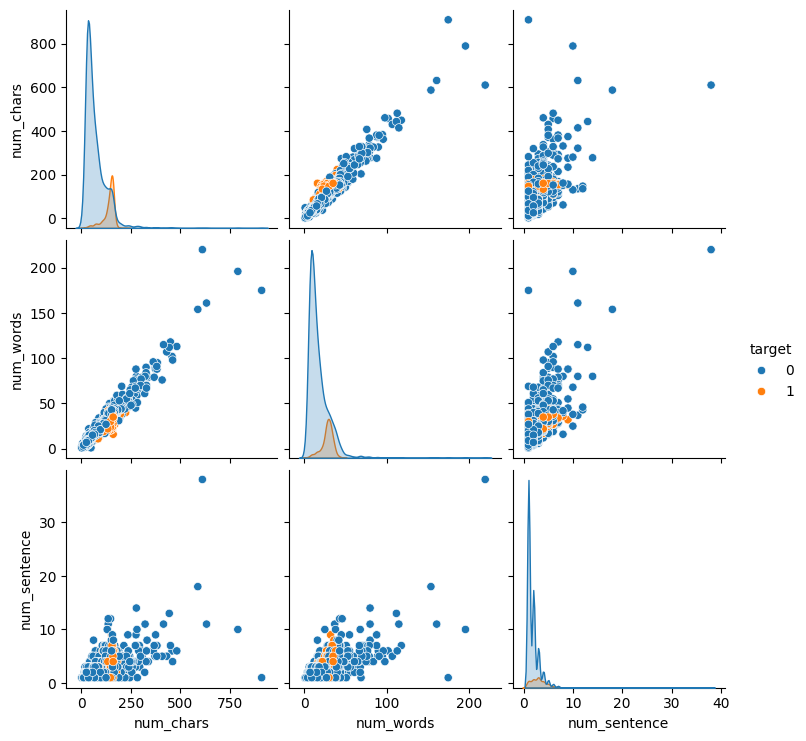

In [664]:
#generating a pair plot of data
sns.pairplot(df, hue="target")
plt.show()

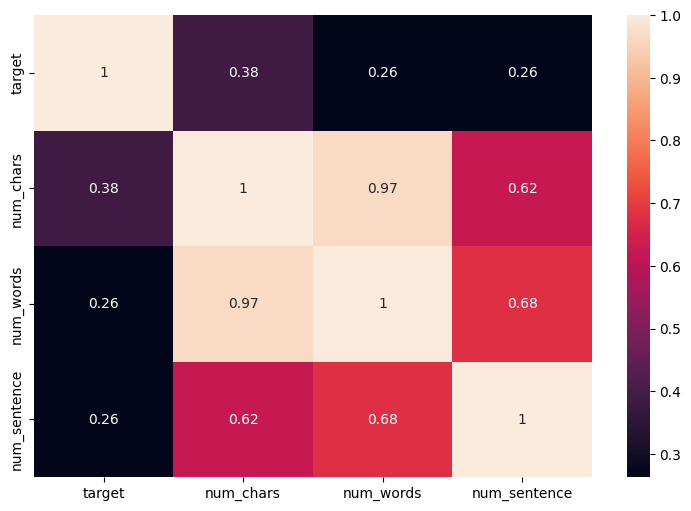

"\nConclusion: \n1. num_chars and num_words have very high correlation (~0.97)'\n2. num_sentence is also positively correlated with both num_chars (0.62) and num_words (0.68)\n3. target shows moderate correlation with num_chars(0.38) but very week correlation with num_words, num_sentence\n\n- From points 1 and 2: There’s multicollinearity among num_chars, num_words, and num_sentence.\n- Target is not depended heavily on num_chars, num_words, and num_sentence linearly.\n- For model training num_sentence, num_words: Drop, Use num_chars (since it has highest correlation amount 3 with target)\n\n"

In [ ]:
#getting the correlation

#getting only the numeric cols
df_numeric = df.select_dtypes(include=np.number)
# print(df_numeric.corr())

#plotting the correlation
plt.figure(figsize=(9, 6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

'''
Conclusion:
1. num_chars and num_words have very high correlation (~0.97)'
2. num_sentence is also positively correlated with both num_chars (0.62) and num_words (0.68)
3. target shows moderate correlation with num_chars(0.38) but very week correlation with num_words, num_sentence

- From points 1 and 2: There’s multicollinearity among num_chars, num_words, and num_sentence.
- Target is not depended heavily on num_chars, num_words, and num_sentence linearly.
- For model training num_sentence, num_words: Drop, Use num_chars (since it has highest correlation amount 3 with target)

'''

# **3. Data Preprocessing**

- Convert all texts to lower case
- Perform Tokenization
- Remove special chars
- Remove stop words
- Remove puntuations
- Perform Stemming


In [666]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#func to perform all above task

def text_transformer(text):
    #1. converting to lower case
    text = text.lower()

    # 2. Tokenize
    text = nltk.word_tokenize(text)

    #3. Remove special chars
    y = []
    for word in text:
        if word.isalnum:
            y.append(word)

    text = y[:]     #shallow copy
    y.clear()

    #4. Remove stopwords and punctuation
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)

    text = y[:]
    y.clear()

    #5. Stemming: bring words to root form
    ps = nltk.PorterStemmer()
    for word in text:
        y.append(ps.stem(word))

    return " ".join(y)

In [ ]:
#transforming the text of data and creating an new column
df["transformed_text"]  = df["text"].apply(text_transformer)
df.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


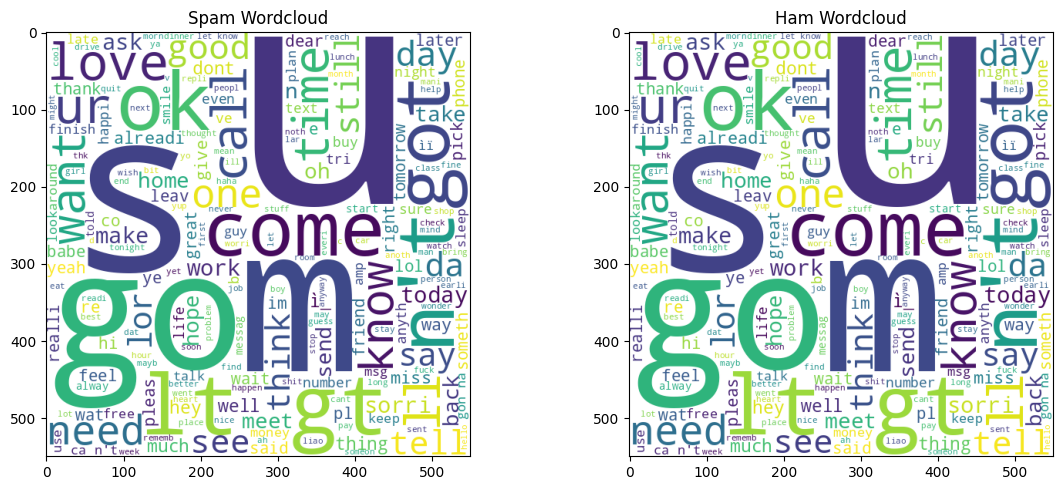

In [669]:
from wordcloud import WordCloud

wc = WordCloud(width=550, height=550, min_font_size=10, background_color="white")


#for spam msg
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))
#for ham
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc)
plt.title("Spam Wordcloud")

plt.subplot(1, 2, 2)
plt.imshow(ham_wc)
plt.title("Ham Wordcloud")

plt.tight_layout()
plt.show()

# **4. Model Building**

### **- Using CountVectorizer**

In [670]:
from sklearn.feature_extraction.text import CountVectorizer

#count vectorizer: each unique word is a feature
cv = CountVectorizer()

X = cv.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (5169, 7377)
Shape of y: (5169,)


In [671]:
#spliting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [672]:
#using NaiveBays Algo

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

#data dis unknown: so testing on all algos
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

nb_models = {
    "GaussianNB": gnb,
    "MultinomialNB": mnb,
    "BernoulliNB": bnb
}

In [673]:
model_metrices_cv = {
    "accuracy": {},
    "precision": {}
}
cm_cv = {}

for model_name, model_obj in nb_models.items():
    print(f"TRAINING USING: {model_name}")
    model_obj.fit(X_train, y_train)
    y_pred = model_obj.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    prec = round(precision_score(y_test, y_pred)*100, 2)
    cm_ = confusion_matrix(y_test, y_pred)

    model_metrices_cv["accuracy"][model_name] = acc
    model_metrices_cv["precision"][model_name] = prec
    cm_cv[model_name] = cm_

    print(f"Accuracy: {acc}%")
    print(f"Precision: {prec}%")
    print(f"Confusion Matrix: \n{cm_}\n")

TRAINING USING: GaussianNB
Accuracy: 87.81%
Precision: 54.04%
Confusion Matrix: 
[[781 108]
 [ 18 127]]

TRAINING USING: MultinomialNB
Accuracy: 97.68%
Precision: 89.54%
Confusion Matrix: 
[[873  16]
 [  8 137]]

TRAINING USING: BernoulliNB
Accuracy: 97.1%
Precision: 96.75%
Confusion Matrix: 
[[885   4]
 [ 26 119]]



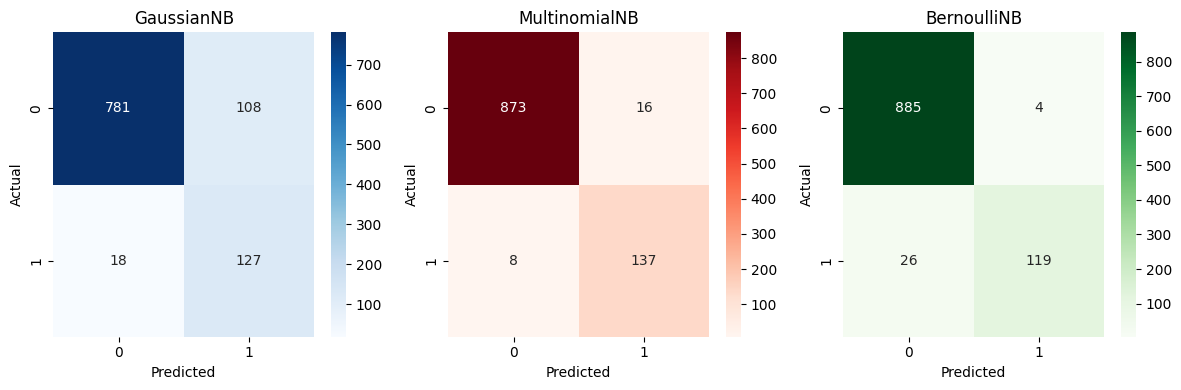

In [674]:
# ploting the confusion matrix for 3 algos

cm1, cm2, cm3 = cm_cv["GaussianNB"], cm_cv["MultinomialNB"], cm_cv["BernoulliNB"]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds")
plt.title("MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 3)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Greens")
plt.title("BernoulliNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

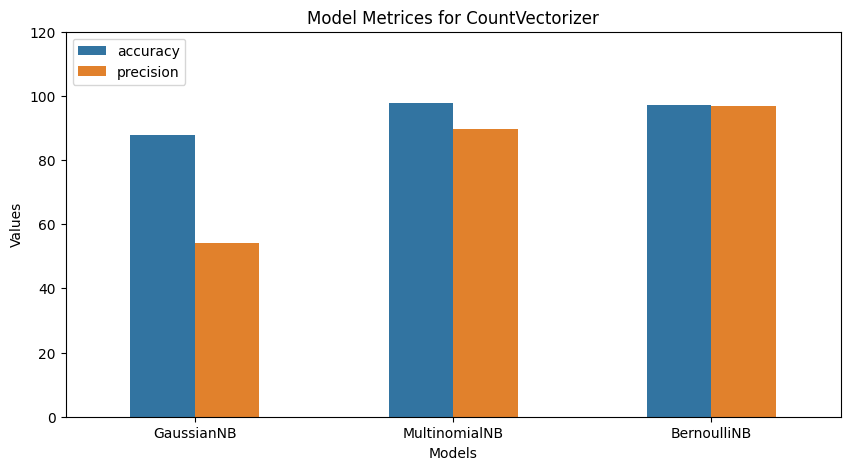

In [675]:
#ploting the accuracy and precesion of differn models
metrices_df_cv = pd.DataFrame(model_metrices_cv).reset_index()
metrices_df_cv.rename(columns={"index": "model"}, inplace=True)

# melt the DataFrame into a long format for grouping
metrices_df_cv_plot = metrices_df_cv.melt(
    id_vars='model',
    var_name='metric',
    value_name='score'
)

plt.figure(figsize=(10, 5))
sns.barplot(metrices_df_cv_plot, x='model', y='score', hue='metric', width=0.5)
plt.ylim(0, 120)
plt.legend(loc='upper left')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Model Metrices for CountVectorizer")
plt.show()

### **- Using TfidfVectorizer**

In [676]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf vectorizer
tv = TfidfVectorizer()

X = tv.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (5169, 7377)
Shape of y: (5169,)


In [677]:
#spliting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [678]:
model_metrices_tv = {
    "accuracy": {},
    "precision": {}
}
cm_tv = {}

for model_name, model_obj in nb_models.items():
    print(f"TRAINING USING: {model_name}")
    model_obj.fit(X_train, y_train)
    y_pred = model_obj.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    prec = round(precision_score(y_test, y_pred)*100, 2)
    cm_ = confusion_matrix(y_test, y_pred)

    model_metrices_tv["accuracy"][model_name] = acc
    model_metrices_tv["precision"][model_name] = prec
    cm_tv[model_name] = cm_

    print(f"Accuracy: {acc}%")
    print(f"Precision: {prec}%")
    print(f"Confusion Matrix: \n{cm_}\n")

TRAINING USING: GaussianNB
Accuracy: 87.33%
Precision: 53.04%
Confusion Matrix: 
[[781 108]
 [ 23 122]]

TRAINING USING: MultinomialNB
Accuracy: 96.62%
Precision: 100.0%
Confusion Matrix: 
[[889   0]
 [ 35 110]]

TRAINING USING: BernoulliNB
Accuracy: 97.1%
Precision: 96.75%
Confusion Matrix: 
[[885   4]
 [ 26 119]]



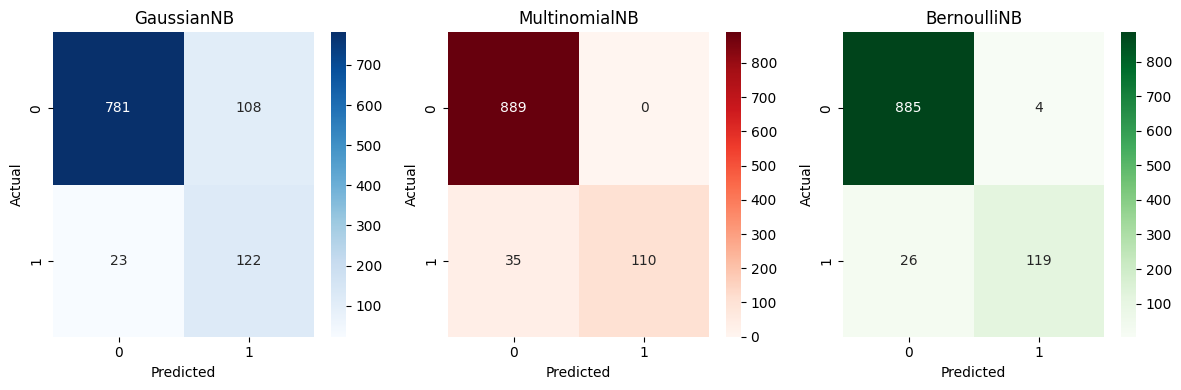

In [679]:
# ploting the confusion matrix for 3 algos

cm1, cm2, cm3 = cm_tv["GaussianNB"], cm_tv["MultinomialNB"], cm_tv["BernoulliNB"]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds")
plt.title("MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 3)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Greens")
plt.title("BernoulliNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

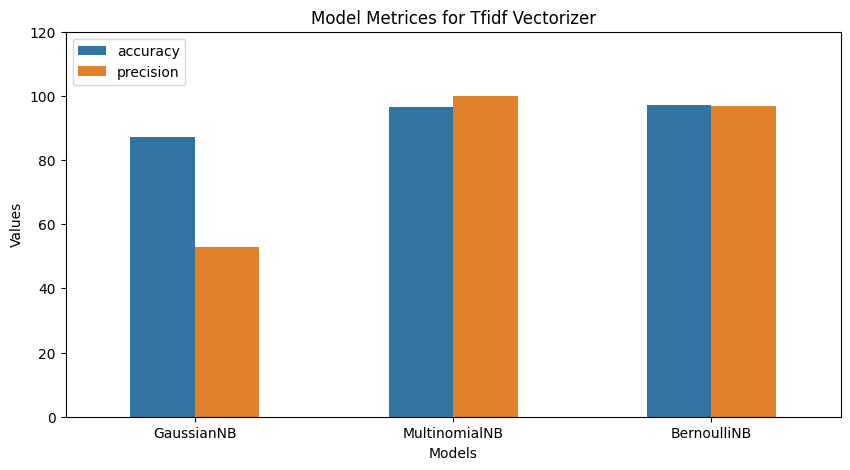

In [680]:
#ploting the accuracy and precesion of differn models
metrices_df_tv = pd.DataFrame(model_metrices_tv).reset_index()
metrices_df_tv.rename(columns={"index": "model"}, inplace=True)
# print(metrices_df_tv)
# melt the DataFrame into a long format for grouping
metrices_df_tv_plot = metrices_df_tv.melt(
    id_vars='model',
    var_name='metric',
    value_name='score'
)
# print(metrices_df_tv)

plt.figure(figsize=(10, 5))
sns.barplot(metrices_df_tv_plot, x='model', y='score', hue='metric', width=0.5)
plt.ylim(0, 120)
plt.legend(loc='upper left')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Model Metrices for Tfidf Vectorizer")
plt.show()

#### **- Tuning the max_ hyperparameter in TfidfVectorizer**

In [681]:
#tfidf vectorizer
tv = TfidfVectorizer(max_features=3000)

X = tv.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

#spliting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X: (5169, 3000)
Shape of y: (5169,)


In [682]:
model_metrices_tv2 = {
    "accuracy": {},
    "precision": {}
}
cm_tv2 = {}

for model_name, model_obj in nb_models.items():
    print(f"TRAINING USING: {model_name}")
    model_obj.fit(X_train, y_train)
    y_pred = model_obj.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    prec = round(precision_score(y_test, y_pred)*100, 2)
    cm_ = confusion_matrix(y_test, y_pred)

    model_metrices_tv2["accuracy"][model_name] = acc
    model_metrices_tv2["precision"][model_name] = prec
    cm_tv2[model_name] = cm_

    print(f"Accuracy: {acc}%")
    print(f"Precision: {prec}%")
    print(f"Confusion Matrix: \n{cm_}\n")

TRAINING USING: GaussianNB
Accuracy: 86.65%
Precision: 51.5%
Confusion Matrix: 
[[776 113]
 [ 25 120]]

TRAINING USING: MultinomialNB
Accuracy: 97.68%
Precision: 99.19%
Confusion Matrix: 
[[888   1]
 [ 23 122]]

TRAINING USING: BernoulliNB
Accuracy: 97.97%
Precision: 98.44%
Confusion Matrix: 
[[887   2]
 [ 19 126]]



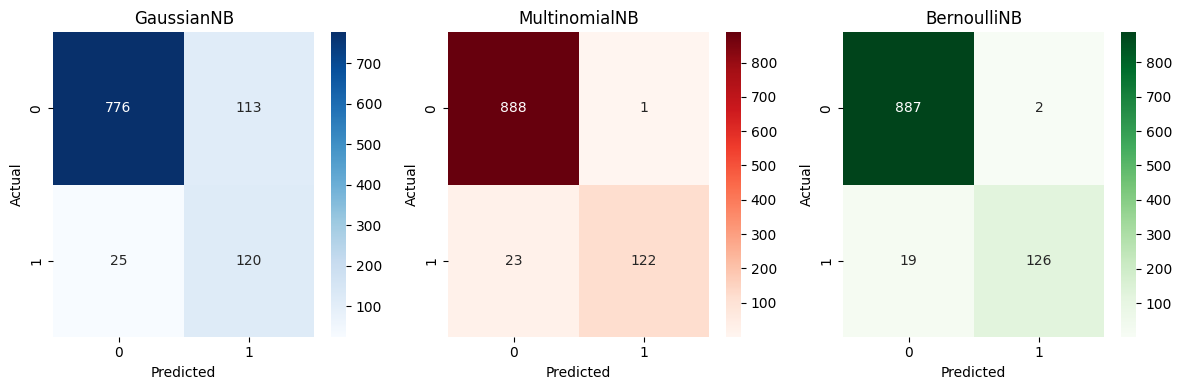

In [683]:
# ploting the confusion matrix for 3 algos

cm1, cm2, cm3 = cm_tv2["GaussianNB"], cm_tv2["MultinomialNB"], cm_tv2["BernoulliNB"]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.title("GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds")
plt.title("MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 3)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Greens")
plt.title("BernoulliNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

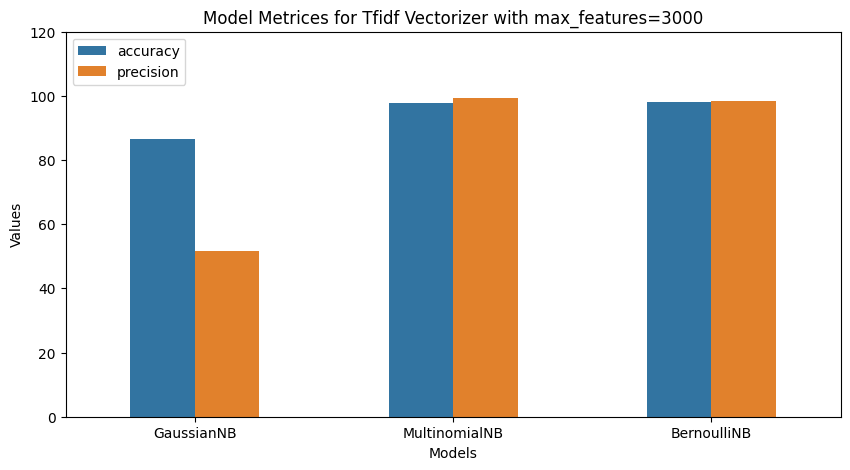

In [684]:
#ploting the accuracy and precesion of differn models
metrices_df_tv2 = pd.DataFrame(model_metrices_tv2).reset_index()
metrices_df_tv2.rename(columns={"index": "model"}, inplace=True)

# melt the DataFrame into a long format for grouping
metrices_df_tv2_plot = metrices_df_tv2.melt(
    id_vars='model',
    var_name='metric',
    value_name='score'
)

plt.figure(figsize=(10, 5))
sns.barplot(metrices_df_tv2_plot, x='model', y='score', hue='metric', width=0.5)
plt.ylim(0, 120)
plt.legend(loc='upper left')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Model Metrices for Tfidf Vectorizer with max_features=3000")
plt.show()

In [ ]:
#creating the final model matrix

model_matrix = metrices_df_cv
model_matrix.rename(columns={"accuracy": "count_vect_accuracy","precision": "count_vect_precision"}, inplace=True)
model_matrix["tfidf_accuracy"] = metrices_df_tv["accuracy"]
model_matrix["tfidf_precision"] = metrices_df_tv["precision"]
model_matrix["tfidf_3000_accuracy"] = metrices_df_tv2["accuracy"]
model_matrix["tfidf_3000_precision"] = metrices_df_tv2["precision"]
model_matrix

,model,count_vect_accuracy,count_vect_precision,tfidf_accuracy,tfidf_precision,tfidf_3000_accuracy,tfidf_3000_precision
0,GaussianNB,87.81,54.04,87.33,53.04,86.65,51.50
1,MultinomialNB,97.68,89.54,96.62,100.00,97.68,99.19
2,BernoulliNB,97.10,96.75,97.10,96.75,97.97,98.44


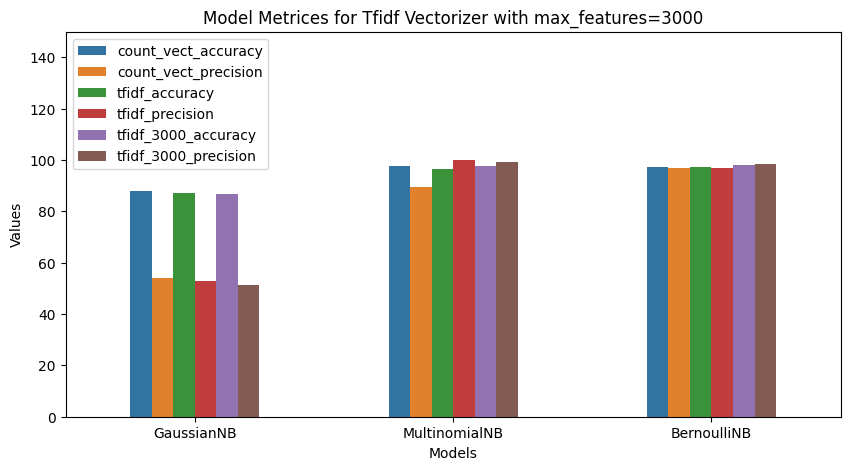

In [699]:
# melt the DataFrame into a long format for grouping
model_matrix_plot = model_matrix.melt(
    id_vars='model',
    var_name='metric',
    value_name='score'
)

plt.figure(figsize=(10, 5))
sns.barplot(model_matrix_plot, x='model', y='score', hue='metric', width=0.5)
plt.ylim(0, 150)
plt.legend(loc='upper left')
plt.xlabel("Models")
plt.ylabel("Values")
plt.title("Model Metrices for Tfidf Vectorizer with max_features=3000")
plt.show()